Accuracy: 1.0


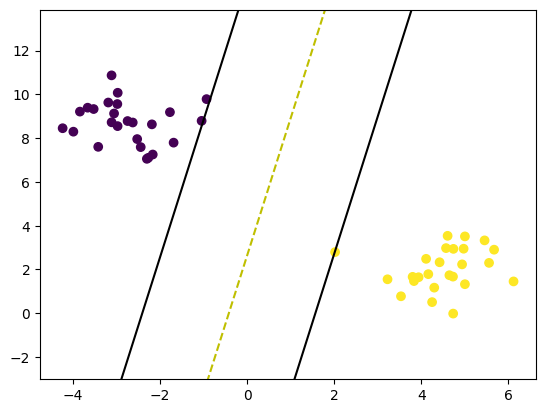

In [ ]:
# prompt: Create a SVM from scratch using just numpy and a toy data set

import numpy as np
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # ensure y is either -1 or 1
        y_ = np.where(y <= 0, -1, 1)

        # initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    dw = 2 * self.lambda_param * self.weights
                    db = 0
                else:
                    dw = 2 * self.lambda_param * self.weights - np.dot(x_i, y_[idx])
                    db = y_[idx]

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)

# Create a toy dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=42)
# change labels from 0,1 to -1,1
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM
svm = SVM()
svm.fit(X_train, y_train)

# Make predictions
predictions = svm.predict(X_test)

# Evaluate the model (optional)
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print(f"Accuracy: {accuracy(y_test, predictions)}")

# Visualize the decision boundary (requires matplotlib)


def plot_svm_boundary(X, y, svm):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, svm.weights, svm.bias, 0)
    x1_2 = get_hyperplane_value(x0_2, svm.weights, svm.bias, 0)

    x1_1_m = get_hyperplane_value(x0_1, svm.weights, svm.bias, -1)
    x1_2_m = get_hyperplane_value(x0_2, svm.weights, svm.bias, -1)

    x1_1_p = get_hyperplane_value(x0_1, svm.weights, svm.bias, 1)
    x1_2_p = get_hyperplane_value(x0_2, svm.weights, svm.bias, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

plot_svm_boundary(X, y, svm)
